## Part I




### Excercise 1

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

#### 1.a

In [ ]:
# Define functions for all the rest of exercise 1
def phi_x(x, k):
    '''
    For a given input and degree k, return its feature map with 
        k-degree polynomial basis

    Input: -x: array, input training data

           -k: int, degree of the basis

    Output: array but change each element in the original x to an
                array with k elements 
    '''
    feature_mapped_x = [[] for i in range(len(x))]
    for i in range(len(x)):
        feature_mapped_x[i] = [(x[i] ** m) for m in range(0, k)]
    return np.array(feature_mapped_x)


def weight(x, g):
    '''
    Compute w = (X_T·X)^(-1)X_T·y

    Input: -x: array, feature map of x

           -g: array, y data

    Output: array with dimention of features
    '''
    return np.matmul(np.matmul(inv(np.matmul(x.T, x)), x.T), g)


def cal_mse(g, g_predict, k):
    '''
    Compute mse with given y data and predicted y data

    Input: -g: array, y data

           -g_predict: array, predicted y data

           -k: int, degree of basis

    Output: int, the value of mse
    '''
    mse = 0
    for i in range(len(g)):
        mse += (g[i] - g_predict[i]) ** 2
    return mse / len(g)


def predict(x, g, k):
    '''
    Get predicted y data and weight. First get feature map of x, then calculate
        the weight, and finally get y_hat = phi·weight
    
    Input: -x: array, training input

           -g: array, training label

    Output: -y_hat: array, predicted y with training data

            -w: array, dimention equal to features
    '''
    phix = phi_x(x, k)
    w = weight(phix, g)
    return np.matmul(phix, w), w


def test(x, k, w):
    '''
    Get predicted y with testing inputs and trained weight

    Input: -x: array, testing input

           -k: int, degree of basis

           -w: array, trained weight

    Output: array, predicted test y
    '''
    phix_test = phi_x(x, k)
    return np.matmul(phix_test, w)

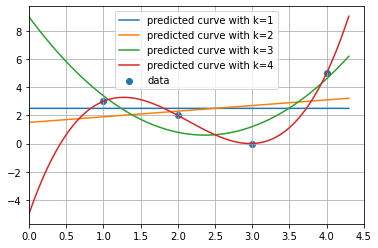

In [ ]:
# Initialization of data
k_list = [1,2,3,4]
x = np.array([1,2,3,4])
y = np.array([3,2,0,5])
plot_x = np.arange(0,4.3,1e-3) # points for ploting curve

w_list, y_hat_plot_list = [], []
for k in k_list:
    y_hat, w = predict(x, y, k)
    w_list.append(w)
    y_hat_plot_list.append(test(plot_x, k, w))


fig, ax = plt.subplots()
ax.scatter(x, y, label='data')
for i in range(len(k_list)):
    ax.plot(plot_x, y_hat_plot_list[i], label='predicted curve with k={}'.format(k_list[i]))
plt.legend()
plt.xlim([0,4.5])
plt.grid()
plt.savefig("1-1-a",dpi=500)
plt.show()

#### 1.b

In [ ]:
print(w_list)
# # the list of w with different degree k. Each element is the coordinates from degree 0 to k

# print("k=1, y=2.5")
# print("k=2, y=1.5+0.4x")
# print("k=3, y=9-7.1x+1.5x^2")
# print("k=4, y=-5+15.17x-8.5x^2+1.33x^3")

[array([2.5]), array([1.5, 0.4]), array([ 9. , -7.1,  1.5]), array([-5.        , 15.16666667, -8.5       ,  1.33333333])]
k=1, y=2.5
k=2, y=1.5+0.4x
k=3, y=9-7.1x+1.5x^2
k=4, y=-5+15.17x-8.5x^2+1.33x^3


#### 1.c

In [ ]:
mse_list = []
for i in range(4):
    y_hat = test(x, k_list[i], w_list[i])
    mse_list.append(cal_mse(y, y_hat, k_list[i]))
print(mse_list) # The list of mse with different k

[3.25, 3.05, 0.800000000000001, 5.293827809328369e-24]


### Excercise 2

In [ ]:
# Initialization for librarys and k lists
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
k_list1 = [2, 5, 10, 14, 18]
k_list2 = [i for i in range(1, 19)]

##### 2-(a)-i

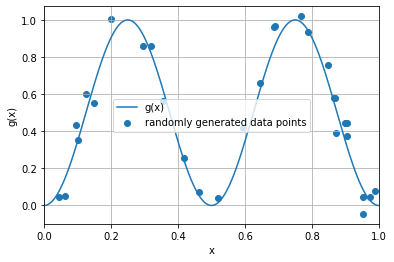

In [ ]:
# Data-point initialization
from matplotlib.pyplot import figure
x = np.random.uniform(0, 1, 30)
epsilon = np.random.normal(0, 0.07, 30)
g = (np.sin(2 * np.pi * x))**2 + epsilon

# Print data points and functions
fig, ax = plt.subplots()
ax.scatter(x, g, label='randomly generated data points')
function_x = np.arange(0, 1, 0.0001)
ax.plot(function_x, (np.sin(2 * np.pi * function_x))**2, label='g(x)')

plt.grid()
plt.xlim([0,1])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.savefig("1-2-a-i",dpi=500)

plt.show()

##### 2-(a)-ii

In [ ]:
# Define functions for all the rest of exercise 2
def phi_x(x, k):
    '''
    For a given input and degree k, return its feature map with 
        k-degree polynomial basis

    Input: -x: array, input training data

           -k: int, degree of the basis

    Output: array but change each element in the original x to an
            array with k elements 
    '''
    feature_mapped_x = [[] for i in range(len(x))]
    for i in range(len(x)):
        feature_mapped_x[i] = [(x[i] ** m) for m in range(0, k)]
    return np.array(feature_mapped_x)


def weight(x, g):
    '''
    Compute w = (X_T·X)^(-1)X_T·y

    Input: -x: array, feature map of x

           -g: array, y data

    Output: array with dimention of features
    '''
    return np.matmul(np.matmul(inv(np.matmul(x.T, x)), x.T), g)


def cal_mse(g, g_predict, k):
    '''
    Compute mse with given y data and predicted y data

    Input: -g: array, y data

           -g_predict: array, predicted y data

           -k: int, degree of basis

    Output: int, the value of mse
    '''
    mse = 0
    for i in range(len(g)):
        mse += (g[i] - g_predict[i]) ** 2
    return mse / len(g)


def predict(x, g, k):
    '''
    Get predicted y data and weight. First get feature map of x, then calculate
        the weight, and finally get y_hat = phi·weight
    
    Input: -x: array, training input

           -g: array, training label

    Output: -y_hat: array, predicted y with training data

            -w: array, dimention equal to features
    '''
    phix = phi_x(x, k)
    w = weight(phix, g)
    return np.matmul(phix, w), w


def test(x, k, w):
    '''
    Get predicted y with testing inputs and trained weight

    Input: -x: array, testing input

           -k: int, degree of basis

           -w: array, trained weight

    Output: array, predicted test y
    '''
    phix_test = phi_x(x, k)
    return np.matmul(phix_test, w)


def plotcurve(x, g, x_plot, g_predict, k):
    '''
    Plot the trained curve with weight

    Input: -x: array, training input

           -g: array, training label

           -x_plot: array, generated x points waiting to be predicted

           -g_predict: array, predicted training y

           -k: int, degree of basis
    '''
    # Pair x and y_predict, then sort the points
    g_dict, g_predict_dict = {}, {}
    for i in range(len(x)):
        g_dict[x[i]] = g[i]
        g_predict_dict[x[i]] = g_predict[i]
    for i in range(len(x)):
        g[i] = g_dict[x[i]]
        g_predict[i] = g_predict_dict[x[i]] 

    fig, ax = plt.subplots()
    ax.scatter(x, g, label='data points', c  = 'r')
    ax.plot(x_plot, g_predict, label='predicted function', c = "b")
    plt.title('k = {0}'.format(k))
    plt.legend()
    plt.grid()
    plt.savefig("1-2-a-ii_" + str(k))
    plt.show()

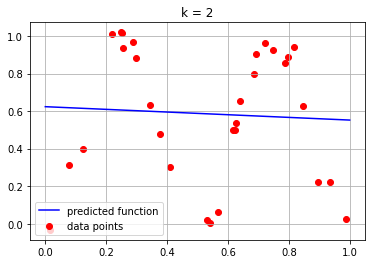

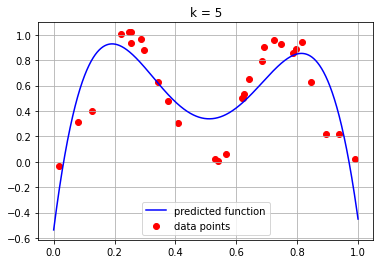

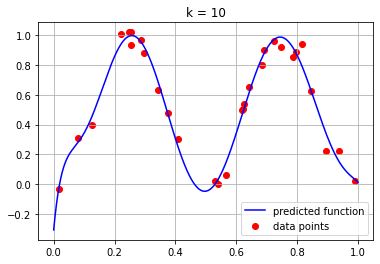

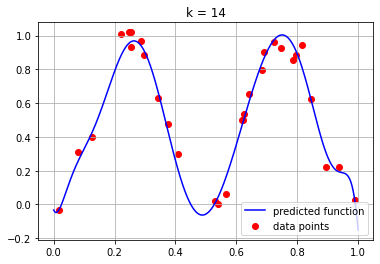

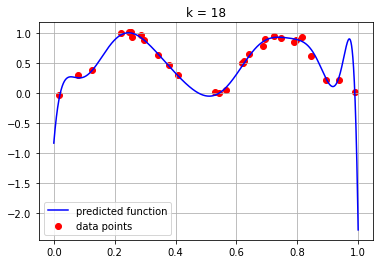

In [ ]:
# Plot different curves with k's
for k in k_list1:
	g_predict, w = predict(x, g, k)
	x_plot = np.arange(0,1,0.0001)
	g_plot = test(x_plot, k, w)
	plotcurve(x, g, x_plot, g_plot, k)
	

##### 2-(b)

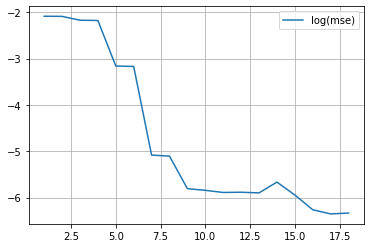

In [ ]:
# Plot log(mse) for different k
mse_list = []
for k in k_list2:
    g_predict, w = predict(x, g, k)
    mse = cal_mse(g, g_predict, k)
    mse_list.append(mse)
plt.plot(k_list2, np.log(mse_list), label='log(mse)')
plt.legend()
plt.grid()
plt.show()

##### 2-(c)

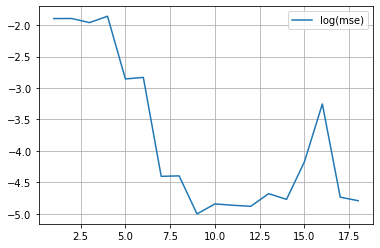

In [ ]:
# Initialize test-pool datapoints
x_test = np.random.uniform(0, 1, 1000)
epsilon_test = np.random.normal(0, 0.07, 1000)
g_test = (np.sin(2 * np.pi * x_test))**2 + epsilon_test

mse_test_list = []
for k in k_list2:
    g_predict, w = predict(x, g, k)
    g_predict_test = test(x_test, k, w)
    test_mse = cal_mse(g_test, g_predict_test, k)
    mse_test_list.append(test_mse)
plt.plot(k_list2, np.log(mse_test_list), label='log(mse)')
plt.legend()
plt.grid()
plt.show()

##### 2-(d)

In [ ]:
# repeat 2-(b) and 2-(c) with 100 epochs
mse_train_list = []
mse_test_list = []

for k in k_list2:
    mse_train = 0
    mse_test = 0
    epoch = 0
    while epoch < 100:
        # Generate data for each epoch
        x = np.random.uniform(0, 1, 30)
        epsilon = np.random.normal(0, 0.07, 30)
        g = (np.sin(2 * np.pi * x))**2 + epsilon
        x_test = np.random.uniform(0, 1, 1000)
        epsilon_test = np.random.normal(0, 0.07, 1000)
        g_test = (np.sin(2 * np.pi * x_test))**2 + epsilon_test
        ### train and get trained mse
        g_predict, w = predict(x, g, k)
        g_predict_test = test(x_test, k, w)
        mse_train += cal_mse(g_predict, g, k)
        mse_test += cal_mse(g_test, g_predict_test, k)
        epoch += 1
    # Get the average mse values
    mse_train_list.append(mse_train/100)
    mse_test_list.append(mse_test/100)



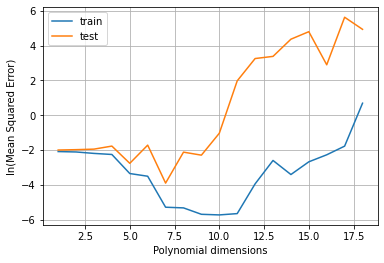

In [ ]:
# Plot curves with ln(avg)
plt.plot(k_list2, np.log(mse_train_list), label='train')
plt.plot(k_list2, np.log(mse_test_list), label='test')
plt.legend()
plt.xlabel("Polynomial dimensions")
plt.ylabel("ln(Mean Squared Error)")
plt.grid()
plt.savefig("1-2-d", dpi=500)
plt.show()

### Excercise 3

In [ ]:
# Initialization for librarys and k lists
import matplotlib.pyplot as plt
import numpy as np
k_list = [i for i in range(1, 19)]

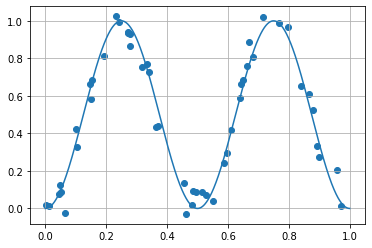

In [ ]:
# Data-point initialization
x = np.random.uniform(0, 1, 50)
epsilon = np.random.normal(0, 0.07, 50)
g = (np.sin(2 * np.pi * x))**2 + epsilon

# Print data points and functions
fig, ax = plt.subplots()
ax.scatter(x, g)
# x.sort()
function_x = np.arange(0, 1, 0.0001)
ax.plot(function_x, (np.sin(2 * np.pi * function_x))**2)
plt.grid()
plt.show()

In [ ]:
# Define functions for all the rest of exercise 3
from numpy.linalg import inv

def gen_data(x, y, k):
    '''
    For a given input and degree k, return its feature map with 
        k-sin-function basis, and y data

    Input: -x: array, input training data

           -y: array, input training labels

           -k: int, degree of the basis

    Output: - array but change each element in the original x to an
              array with k elements 

            - y data
    '''
    feature_mapped_x = [[] for i in range(len(x))] # x with dimention (m,1) to dimention (m,n)
    for i in range(len(x)):
        feature_mapped_x[i] = [np.sin(np.pi * x[i] * m) for m in range(1, k)]
        feature_mapped_x[i].append(1) #bias term in X

    return np.array(feature_mapped_x), y

def compute_weight(X, y):   
    '''
    Compute w = (X_T·X)^(-1)X_T·y

    Input: -X: array, feature map of x

           -y: array, y data

    Output: array with dimention of features
    '''
    return np.dot(np.matmul(inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)

def predict_y(w, X):
    '''
    Get predicted y data with y=w^T·X
    
    Input: -X: array, training input

           -w: array, trained weight

    Output: -y_hat: array, predicted y with training data
    '''
    return np.matmul(X, w)

def cal_mse(y, y_pred):
    '''
    Compute mse with given y data and predicted y data

    Input: -y: array, y data

           -y_pred: array, predicted y data

    Output: int, the value of mse
    '''
    mse = 0
    for i in range(len(y)):
        mse += (y[i] - y_pred[i]) ** 2
    return mse / len(y)

def forward_train(x, y, k):
    '''
    Get trained weight and calculate trained mse

    Input: -y: array, y data

           -x: array, input training data

           -k: int, sin-function parameter

    Output: -w: trained weight with dimention n

            -mse: int, the value of training mse
    '''
    X, y = gen_data(x, y, k)
    w = compute_weight(X, y)
    y_pred = predict_y(w, X)
    mse = cal_mse(y_pred, y)
    return w, mse

def forward_test(x, y, w, k):
    '''
    Get test mse with test data and test labels

    Input: -x: array, testing input

           -k: int, sin-function parameter

           -w: array, trained weight

    Output: int, value of test mse
    '''
    X, y = gen_data(x, y, k)
    y_pred = predict_y(w, X)
    mse = cal_mse(y_pred, y)
    return mse

def plotcurve(x, y, x_pred, y_pred, mse, k):
    '''
    Plot the trained curve with weight

    Input: -x: array, training input

           -y: array, training label

           -x_pred: array, generated x points waiting to be predicted

           -y_pred: array, predicted test y

           -k: int, sin-function parameter
    '''
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='data', c  = 'r')
    ax.plot(x_pred, y_pred,  label='predicted function', c = "b")
    plt.title('k = {0}, MSE = {1:.4f}'.format(k, mse))
    plt.legend()
    plt.grid()
    plt.savefig("1-2-b")
    plt.show()



#### 3-(b)

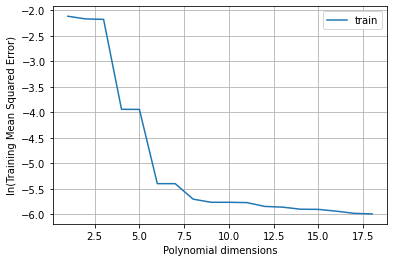

In [ ]:
mse_list = []
w_list = []
for k in k_list:
    # For different k, get different feature maps
    X, y = gen_data(x, g, k)
    w = compute_weight(X, y)
    w_list.append(w)
    y_pred = predict_y(w, X)
    mse = cal_mse(y, y_pred)
    mse_list.append(mse)
    x_pred = np.arange(0,1,0.0001)

# Plot trained mse
plt.plot(k_list, np.log(mse_list), label='train')
plt.legend()
plt.xlabel("Polynomial dimensions")
plt.ylabel("ln(Training Mean Squared Error)")
plt.grid()
plt.savefig("1-3-b", dpi=500)
plt.show()


#### 3-(c)

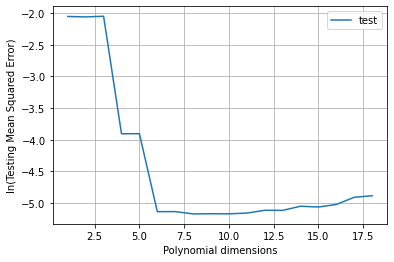

In [ ]:
# Generate 1000 testing points
x_test = np.random.uniform(0, 1, 1000)
epsilon_test = np.random.normal(0, 0.07, 1000)
g_test = (np.sin(2 * np.pi * x_test))**2 + epsilon_test

# Use trained w to get test mse
mse_test_list = []
for k in k_list:
    X_test, y_test = gen_data(x_test, g_test, k)
    y_test_pred = predict_y(w_list[k-1], X_test)
    mse_test = cal_mse(y_test, y_test_pred)
    mse_test_list.append(mse_test)

# Plot the test mse curve
plt.plot(k_list, np.log(mse_test_list), label='test')
plt.legend()
plt.xlabel("Polynomial dimensions")
plt.ylabel("ln(Testing Mean Squared Error)")
plt.grid()
plt.savefig("1-3-c", dpi=500)
plt.show()

#### 3-(d)

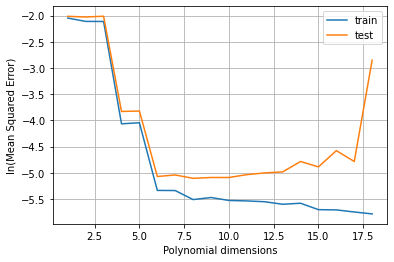

In [ ]:
mse_train_list = []
mse_test_list = []
for k in k_list:
    mse_train = 0
    mse_test = 0
    epoch = 0
    while epoch < 100:
        # Generate data for each epoch
        x = np.random.uniform(0, 1, 50)
        epsilon = np.random.normal(0, 0.07, 50)
        g = (np.sin(2 * np.pi * x))**2 + epsilon
        x_test = np.random.uniform(0, 1, 1000)
        epsilon_test = np.random.normal(0, 0.07, 1000)
        g_test = (np.sin(2 * np.pi * x_test))**2 + epsilon_test
        ### train and get trained mse
        w, mse_t = forward_train(x, g, k)
        mse_train += mse_t
        ### test to get test mse
        mse_test += forward_test(x_test, g_test, w, k)
        epoch += 1
    # Get the average mse values
    mse_train_list.append(mse_train/100)
    mse_test_list.append(mse_test/100)

# Plot curves with ln(avg)
plt.plot(k_list, np.log(mse_train_list), label='train')
plt.plot(k_list, np.log(mse_test_list), label='test')
plt.legend()
plt.xlabel("Polynomial dimensions")
plt.ylabel("ln(Mean Squared Error)")
plt.grid()
plt.savefig("1-3-d", dpi=500)
plt.show()

### Excercise 4

In [18]:
# Library initialization and Get the dataset
from numpy.linalg import inv
import pandas as pd
import numpy as np

!wget http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv

--2021-11-15 11:40:49--  http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv
Resolving www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)... 128.16.6.8
Connecting to www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)|128.16.6.8|:80... connected.
HTTP request sent, awaiting response... 200 Document follows
Length: 31862 (31K) [text/plain]
Saving to: ‘Boston-filtered.csv’

Boston-filtered.csv 100%[===================>]  31.12K  21.8KB/s    in 1.4s    

2021-11-15 11:40:52 (21.8 KB/s) - ‘Boston-filtered.csv’ saved [31862/31862]



In [4]:
# Define functions for all the rest of exercise 4
def gen_data(x, y, num_feat):
    '''
    For a given input and the number of features, return pre-processed data

    Input: -x: array, input training data

           -y: array, input training labels

           -num_feat: int, number of features in [0,1,12], 0 represents naive regression

    Output: - array of training data 

            - y data
    '''
    if num_feat == 0:
        size = len(y)
        X = np.ones((size, 1))
        return np.array(X), y
    if num_feat == 1:
        X_list = []
        for i in range(12):
            X = [[] for _ in range(y.size)]
            for idx in range(y.size):
                X[idx].append(x[idx][i])
                X[idx].append(1) #bias
            X_list.append(np.array(X))
        return X_list, y
    if num_feat == 12:
        X = []
        for line in x:
            a = np.append(line, 1)
            X.append(a)
        return np.array(X), y

def compute_weight(X, y):
    '''
    Compute w = (X_T·X)^(-1)X_T·y

    Input: -X: array, feature map of x

           -y: array, y data

    Output: array with dimention of featureså
    '''
    return np.dot(np.matmul(inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)

def predict_y(w, X):
    '''
    Get predicted y data with y=w^T·X
    
    Input: -X: array, training input

           -w: array, trained weight

    Output: -y_hat: array, predicted y with training data
    '''
    return np.matmul(X, w)

def cal_mse(y, y_pred):
    '''
    Compute mse with given y data and predicted y data

    Input: -y: array, y data

           -y_pred: array, predicted y data

    Output: int, the value of mse
    '''
    mse = 0
    for i in range(len(y)):
        mse += (y[i] - y_pred[i]) ** 2
    return mse / len(y)

def forward_train(x, y, num_feat):
    '''
    Get trained weight and calculate trained mse

    Input: -y: array, y data

           -x: array, input training data

           -num_feat: int, number of features

    Output: -w_list: array, trained weights with dimention n and features

            -mse_list: array, the array of training mse's
    '''
    if num_feat == 1:
        mse_list = []
        w_list = []
        X_list, y = gen_data(x, y, num_feat)
        for idx in range(len(X_list)):
            w = compute_weight(X_list[idx], y)
            w_list.append(w)
            y_pred = predict_y(w, X_list[idx])
            mse = cal_mse(y_pred, y)
            mse_list.append(mse)
        return w_list, np.array(mse_list)

    else:
        X, y = gen_data(x, y, num_feat)
        w = compute_weight(X, y)
        y_pred = predict_y(w, X)
        mse = cal_mse(y_pred, y)
        return w, mse

def forward_test(x, y, w, num_feat):
    '''
    Get test mse with test data and test labels

    Input: -x: array, testing input

           -y: array, testing labels

           -w: array, trained weight

           -num_feat: int, number of attributes

    Output: int/array, value of test mse
    '''
    if num_feat == 1:
        mse_list = []
        X_list, y = gen_data(x, y, num_feat)
        for idx in range(len(X_list)):
            y_pred = predict_y(w[idx], X_list[idx])
            mse = cal_mse(y_pred, y)
            mse_list.append(mse)
        return np.array(mse_list)
    else:
        X, y = gen_data(x, y, num_feat)
        y_pred = predict_y(w, X)
        mse = cal_mse(y_pred, y)
        return mse

def plotcurve(x, y, y_predict, mse):
    '''
    Plot the trained curve with weight

    Input: -x: array, training input

           -y: array, training label

           -x_pred: array, generated x points waiting to be predicted

           -y_pred: array, predicted test y

           -k: int, sin-function parameter
    '''
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='data')
    ax.scatter(x, y_pred, label='predict')
    plt.title('k = {0}, MSE = {1:.4f}'.format(k, mse))
    plt.legend()
    plt.grid()
    plt.show()



In [ ]:
# Pre-process data and get training data and labels
df = pd.read_csv("Boston-filtered.csv")
data = df.values

mse_naive_train_avg = 0
mse_naive_test_avg = 0
mse_1_train_avg_list = np.zeros(12)
mse_1_test_avg_list = np.zeros(12)
mse_12_train_avg = 0
mse_12_test_avg = 0

# Run 20 epochs
for epoch in range(20):
    # Shuffle data and get train/test data with 1/3 split
    np.random.shuffle(data)
    data_x = data[:, :-1]
    data_y = data[:, -1]
    test_size = len(data) // 3
    x_test = data_x[:test_size]
    y_test = data_y[:test_size]
    x_train = data_x[test_size:]
    y_train = data_y[test:]
    ### naive regression// num_feat = 0
    w_naive, mse_naive_train = forward_train(x_train, y_train, 0)
    mse_naive_train_avg += mse_naive_train
    mse_naive_test = forward_test(x_test, y_test, w_naive, 0)
    mse_naive_test_avg += mse_naive_test
    ### 1 attribute regression
    w_1_list, mse_1_train_list = forward_train(x_train, y_train, 1)
    mse_1_train_avg_list += mse_1_train_list
    mse_1_test_list = forward_test(x_test, y_test, w_1_list, 1)
    mse_1_test_avg_list += mse_1_test_list
    ### 12 attributes
    w_12, mse_12_train = forward_train(x_train, y_train, 12)
    mse_12_train_avg += mse_12_train
    mse_12_test = forward_test(x_test, y_test, w_12, 12)
    mse_12_test_avg += mse_12_test

mse_naive_train_avg /= 20
mse_naive_test_avg /= 20
mse_1_train_avg_list /= 20
mse_1_test_avg_list /= 20
mse_12_train_avg /= 20
mse_12_test_avg /= 20

In [ ]:
# Naive regression training mse
mse_naive_train_avg

84.79271236869214

In [ ]:
# Naive regression testing mse
mse_naive_test_avg

84.0813866778901

In [ ]:
# training mse with single attribute
mse_1_train_avg_list 

array([72.15332944, 74.15417807, 66.02972806, 81.27016938, 69.66064257,
       43.71619725, 73.55719562, 79.96827493, 72.89431378, 66.89952879,
       63.86972149, 38.78760727])

In [ ]:
# testing mse with single attribute
mse_1_test_avg_list

array([71.43641268, 72.68531845, 62.62664573, 83.95624221, 68.11762445,
       43.86267735, 70.86453377, 78.24183722, 71.10500818, 64.3274467 ,
       60.8683555 , 38.26294838])

In [ ]:
# training mse with 12 attributes together
mse_12_train_avg 

22.17506649161621

In [ ]:
# testing mse with 12 attributes together
mse_12_test_avg

24.39840263674791

### Excercise 5

In [1]:
# Library and parameter initialization
import random
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy.linalg import norm
import pandas as pd


lam_vector = [2**(-40+i) for i in range(15)]
sigma_vector = [2**7 * 2**(0.5*i) for i in range(13)]

# Get the dataset
!wget http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv

df = pd.read_csv("Boston-filtered.csv")
data = df.values

--2021-11-15 15:28:30--  http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv
Resolving www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)... 128.16.6.8
Connecting to www0.cs.ucl.ac.uk (www0.cs.ucl.ac.uk)|128.16.6.8|:80... connected.
HTTP request sent, awaiting response... 200 Document follows
Length: 31862 (31K) [text/plain]
Saving to: ‘Boston-filtered.csv’

Boston-filtered.csv 100%[===================>]  31.12K  10.5KB/s    in 3.0s    

2021-11-15 15:28:34 (10.5 KB/s) - ‘Boston-filtered.csv’ saved [31862/31862]



In [ ]:
### function initialization for ex5
def kernel(x, t, sigma):
    '''
    return the gaussian kernel of two points, exp(-(||x-t||^2)/(2*sigma^2))

    Input: -x: array, any other points of input X

           -t: array, fixed test point

           -sigma: float, kernel parameter

    Output: float, kernel value
    '''
    return np.exp(-norm(x - t)**2 / (2*(sigma**2)))


def K_matrix(x, sigma):
    '''
    Get the kernel matrix for each point in X, size m*m
    Using bradcase to speed up

    Input: -x: array, input training data

           -sigma: float, kernel parameter

    Output: array (m*m), with each element representing kernel value
    '''
    X_wide = np.reshape(np.tile(x, len(x)), (len(x),len(x),len(x[0]))) #broadcast X widely
    X_deep = X_wide.transpose(1,0,2)
    return np.exp(-np.sum((X_wide - X_deep)**2, axis=2)/(2*sigma**2))


def alpha(x, y, sigma, lam):
    '''
    Get the alpha vector with regulization parameter and kernels

    Input: -x: array, input training data

           -y: array, input training labels

           -sigma: float, kernel parameter

           -lam: ragulator parameter

    Output: array (m*1), alpha vector for
    '''
    K = K_matrix(x, sigma)
    return np.matmul(np.linalg.inv(K + len(x) * lam * np.identity(len(x))), y)
    
    
def pair(sigma_vector, lam_vector):
    '''
    Pair each sigma and lambda value from parameter list

    Input: -sigma_vector: array, sigma list

           -lam_vector: array, lambda list

    Output: list, each element is a pair of sigma and lambda values
    '''
    lst = [] 
    for sigma in sigma_vector:
        for lam in lam_vector:
            lst.append([sigma, lam])
    return lst


def predict(x_train, x_test, alpha_vector, sigma, lam, train=True):
    '''
    Get predicted y with different pair of sigma and lambda values

    #####Using broadcast to speed up######

    Input: -x_train: array, input training data

           -x_test: array, input testing data

           -alpha_vector: array, calculated alpha vector

           -sigma: float, kernel parameter

           -lam: float, ragulator parameter

           -train: bool, True for training prediction, False for testing prediction

    Output: array with predicted y array
    '''
    x = x_train if train else x_test
    x_test_tile = np.reshape(np.tile(x,len(x_train)), (len(x),len(x_train),len(x[0])))#broadcast
    x_train_tile = np.reshape(np.tile(x_train,len(x)), (len(x_train),len(x),len(x_train[0])))#broadcast
    x_train_tile = x_train_tile.transpose(1,0,2)
    alpha_vector_tile = np.reshape(np.tile(alpha_vector,len(x)), (len(x),len(alpha_vector)))#broadcast
    return np.sum(alpha_vector_tile * np.exp(-np.sum((x_test_tile - x_train_tile)**2, axis=2)/(2*sigma**2)), axis = 1)
    

def cal_mse(y, y_pred):
    '''
    Compute mse with given y data and predicted y data

    Input: -y: array, y data

           -y_pred: array, predicted y data

    Output: int, the value of mse
    '''
    mse = 0
    for i in range(len(y)):
        mse += (y[i] - y_pred[i]) ** 2
        # mse += abs(y[i] - y_pred[i])
    return mse / len(y)

def cross_val(x, y, sigma_vector, lam_vector):
    '''
    Five-fold cross validtion method, return the mse_list with all results

    Input: -x: array, input training data

           -y: array, input training labels

           -sigma_vector: list, list of sigma values

           -lam_vector: list, list of lambda values

    Output: list of all mse scores
    '''
    ### five fold initializtion
    size = len(y)
    fold_size = size//5
    x_fold_list = []
    y_fold_list = [] 
    ### Divide the training list into 5 roughly equal subsets
    for i in range(5):
        if i < 4:
            x_fold_list.append(x[fold_size*i:fold_size*(i+1)])
            y_fold_list.append(y[fold_size*i:fold_size*(i+1)])
        else:
            x_fold_list.append(x[fold_size*i:])
            y_fold_list.append(y[fold_size*i:])

    ### In each iteration, one of the 5 subsets will be the validation set
    sl_list = pair(sigma_vector, lam_vector)
    cv_error_list = np.zeros(len(sl_list)) #13*15 pairs of parameter
    for i in range(5):    
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        idx_list = [0,1,2,3,4]
        idx_list.remove(i)
        X_test.extend(x_fold_list[i])
        y_test.extend(y_fold_list[i])
        for idx in idx_list:
            X_train.extend(x_fold_list[idx])
            y_train.extend(y_fold_list[idx])
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(X_test)
        y_test = np.array(y_test)

        # Train data and validate the performance for 13*15*5 times
        mse_list = []
        for vector_pair in sl_list:
            sigma, lam = vector_pair[0], vector_pair[1]
            alpha_vector = alpha(X_train, y_train, sigma, lam)
            y_pred = predict(X_train, X_test, alpha_vector, sigma, lam, train=False)
            mse = cal_mse(y_test, y_pred)
            mse_list.append(mse) #13*15
        cv_error_list += np.array(mse_list)
    cv_error_list /= 5
    return cv_error_list



#### 5.a

In [ ]:
# Split the dataset to train and test, then get the index of minimal error using cross validation
np.random.shuffle(data)
data_x = data[:, :-1]
data_y = data[:, -1]
test_size = len(data) // 3
X_test = data_x[:test_size]
y_test = data_y[:test_size]
X_train = data_x[test_size:]
y_train = data_y[test_size:]
cv_error_list = np.array(cross_val(X_train, y_train, sigma_vector, lam_vector))
min_idx = np.argmin(cv_error_list)

# The index of row and column are the optimal choice of sigma and lambda respectively
if min_idx != 0:
    sigma_idx = min_idx // 13 if min_idx % 13 != 0 min_idx // 13 - 1
    lam_idx = min_idx % 13 if min_idx % 15 != 0 else min_idx % 15 - 1
    print("optimal log2(sigma_factor): {0: 3f}, optimal log2(lambda_factor): {1: 3f}".format(np.log2(sigma_vector[sigma_idx]), np.log2(lam_vector[lam_idx])))
else:
    print("optimal log2(sigma_factor): {0: 3f}, optimal log2(lambda_factor): {1: 3f}".format(np.log2(sigma_vector[sigma_idx]), np.log2(lam_vector[lam_idx])))

o_sigma, o_lam = sigma_vector[sigma_idx], lam_vector[lam_idx]

optimal log2(sigma_factor):  9.000000, optimal log2(lambda_factor): -33.000000


####5.b

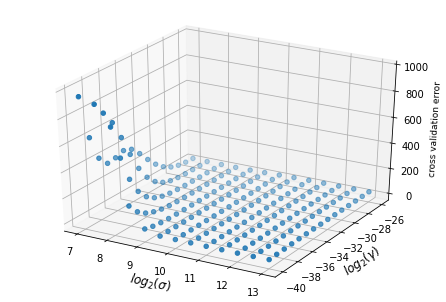

In [ ]:
# Reshape x and y in order to plot the 3-d figure
sigma_vector_tile = np.tile(np.array(np.log2(sigma_vector)), len(lam_vector))
x_axis = np.reshape(sigma_vector_tile, (len(lam_vector), len(sigma_vector))).transpose(1,0).flatten()
lam_vector_tile = np.tile(np.array(np.log2(lam_vector)), len(sigma_vector))
y_axis = np.reshape(lam_vector_tile, (len(sigma_vector), len(lam_vector))).flatten()

# Plot the figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax = Axes3D(fig)
ax.scatter(x_axis, y_axis, cv_error_list)
ax.set_xlabel('$log_2(\sigma)$', fontsize=12, rotation=150)
ax.set_ylabel('$log_2(\gamma)$', fontsize=12, rotation=150)
ax.set_zlabel('cross validation error', fontsize=9)
plt.savefig('1-5-b', dpi=500)
plt.show()

####5.c 

In [ ]:
# Using function defined before to calculate training and testing mse
sigma, lam = o_sigma, o_lam
alpha_vector = alpha(X_train, y_train, sigma, lam)
y_train_pred = predict(X_train, X_test, alpha_vector, sigma, lam, train=True)
y_test_pred = predict(X_train, X_test, alpha_vector, sigma, lam, train=False)
mse_train = cal_mse(y_train, y_train_pred)
mse_test = cal_mse(y_test, y_test_pred)


In [ ]:
mse_train

6.086781591635332

In [ ]:
mse_test

17.27310753285306

#### 5.d

In [ ]:
# Re-initialize data for 20 runs
df = pd.read_csv("Boston-filtered.csv")
data = df.values
training_x = data[:, :-1]
training_y = data[:, -1]

ex4_naive_train = []
ex4_naive_test = []
ex4_1_train = []
ex4_1_test = []
ex4_12_train = []
ex4_12_test = []

ex5_train = []
ex5_test = []

# Run 20 epochs
for epoch in range(20):
    np.random.shuffle(data)
    data_x = data[:, :-1]
    data_y = data[:, -1]
    test_size = len(data) // 3
    x_test = data_x[:test_size]
    y_test = data_y[:test_size]
    x_train = data_x[test_size:]
    y_train = data_y[test:]
    
    #### EX4 a,c,d
    ### naive regression// num_feat = 0
    w_naive, mse_naive_train = forward_train(x_train, y_train, 0)
    mse_naive_test = forward_test(x_test, y_test, w_naive, 0)
    ex4_naive_train.append(mse_naive_train)
    ex4_naive_test.append(mse_naive_test)

    ### 1 attribute regression
    w_1, mse_1_train = forward_train(x_train, y_train, 1)
    mse_1_test = forward_test(x_test, y_test, w_1, 1)
    ex4_1_train.append(mse_1_train)
    ex4_1_test.append(mse_1_test)
    ### 12 attributes
    w_12, mse_12_train = forward_train(x_train, y_train, 12)
    mse_12_test = forward_test(x_test, y_test, w_12, 12)
    ex4_12_train.append(mse_12_train)
    ex4_12_test.append(mse_12_test)


    #### EX5 a,c
    X_train = x_train
    X_test = x_test
    cv_error_list = np.array(cross_val(X_train, y_train, sigma_vector, lam_vector))
    min_idx = np.argmin(cv_error_list)
    if min_idx != 0:
        sigma_idx = min_idx // 13 if min_idx % 13 != 0 else min_idx // 13 - 1
        lam_idx = min_idx % 15 if min_idx % 15 != 0 else min_idx % 15 - 1
        print("optimal log2(sigma_factor): {0: 6f}, optimal log2(lambda_factor): {1: 9f}".format(np.log2(sigma_vector[sigma_idx]), np.log2(lam_vector[lam_idx])))
    else:
        print("optimal log2(sigma_factor): {0: 6f}, optimal log2(lambda_factor): {1: 9f}".format(sigma_vector[sigma_idx], lam_vector[lam_idx]))
    o_sigma, o_lam = sigma_vector[sigma_idx], lam_vector[lam_idx]

    sigma, lam = o_sigma, o_lam
    alpha_vector = alpha(X_train, y_train, sigma, lam)
    y_train_pred = predict(X_train, X_test, alpha_vector, sigma, lam, train=True)
    y_test_pred = predict(X_train, X_test, alpha_vector, sigma, lam, train=False)
    mse_train = cal_mse(y_train, y_train_pred)
    mse_test = cal_mse(y_test, y_test_pred)
    ex5_train.append(mse_train)
    ex5_test.append(mse_test)

optimal log2(sigma_factor):  9.000000, optimal log2(lambda_factor): -26.000000
optimal log2(sigma_factor):  10.000000, optimal log2(lambda_factor): -26.000000
optimal log2(sigma_factor):  10.000000, optimal log2(lambda_factor): -32.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -30.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -29.000000
optimal log2(sigma_factor):  10.000000, optimal log2(lambda_factor): -39.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -30.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -28.000000
optimal log2(sigma_factor):  12.000000, optimal log2(lambda_factor): -26.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -29.000000
optimal log2(sigma_factor):  9.500000, optimal log2(lambda_factor): -29.000000
optimal log2(sigma_factor):  10.000000, optimal log2(lambda_factor): -39.000000
optimal log2(sigma_factor):  9.000000, optimal 

##### Result

In [ ]:
print("train MSE of EX4 naive: {0:.2f} ± {1:.2f}".format(np.mean(ex4_naive_train), np.sqrt(np.var(ex4_naive_train))))

print("test MSE of EX4 naive: {0:.2f} ± {1:.2f}".format(np.mean(ex4_naive_test), np.sqrt(np.var(ex4_naive_test))))

print("train MSE of EX4 with one attribute:")
print(np.mean(ex4_1_train, axis=0), np.sqrt(np.var(ex4_1_train, axis=0)))

print("test MSE of EX4 with one attribute:")
print(np.mean(ex4_1_test, axis=0), np.sqrt(np.var(ex4_1_test, axis=0)))

print("train MSE of EX4 with all attributes: {0:.2f} ± {1:.2f}".format(np.mean(ex4_12_train), np.sqrt(np.var(ex4_12_train))))

print("test MSE of EX4 with all attributes: {0:.2f} ± {1:.2f}".format(np.mean(ex4_12_test), np.sqrt(np.var(ex4_12_test))))

print("train MSE of EX5 Kernel: {0:.2f} ± {1:.2f}".format(np.mean(ex5_train), np.sqrt(np.var(ex5_train))))

print("test MSE of EX5 Kernel: {0:.2f} ± {1:.2f}".format(np.mean(ex5_test), np.sqrt(np.var(ex5_test))))

## Part 2

In [10]:
def gen_data(num):
    '''
    Generate data and labels for hypothesis (random h) with given sample numbers

    Input: -num: int, number of samples

    Output: -X: array of training data in h

            -y: corresponded labels of X
    '''
    x1 = np.random.uniform(0,1,num)
    x1 = np.expand_dims(x1, 1)
    x2 = np.random.uniform(0,1,num)
    x2 = np.expand_dims(x2, 1)
    X = np.hstack((x1, x2))
    y = np.zeros(num)
    for i in range(num):
        y[i] = np.random.randint(2)
    return X, y

def train_test_data(num, X_h, y_h, noise=0):
    '''
    Generate training/testing data and labels with given sample numbers and random h

    Input: -num: int, number of samples

           -X_h: 100 data points generated uniform randomly.

           -y_h: corresponded 100 labels of data points 

           -noise: float in [0,1), noise when generating samples

    Output: -X: array of data 

            -y data
    '''
    x1 = np.random.uniform(0,1,num)
    x1 = np.expand_dims(x1, 1)
    x2 = np.random.uniform(0,1,num)
    x2 = np.expand_dims(x2, 1)
    X = np.hstack((x1, x2))
    y = np.zeros(num)
    for i in range(num):
        if np.random.binomial(1, noise):
            y[i] = np.random.randint(2)
        else:
            y[i] = knn(X_h, y_h, X[i], 3)
    return X, y

def dist(xi, X_train, _type='L2'):
    '''
    Calculate distances between a point xi and all the other points

    Input: -xi: array, one point among X data

           -X_train: array, the input data

           -_type: string, L1/L2, calculating method

    Output: a list with distances
    '''
    dist_list = []
    if _type == 'L2':
        for i in range(len(X_train)):
            dist_list.append(np.sum((xi - X_train[i])**2))
        
    if _type == 'L1':
        for i in range(len(X_train)):
            dist_list.append(np.sum(np.abs(xi - X_train[i])))
    return np.array(dist_list)

def predict(dist_list, y_train, k):
    '''
    Find k points with nearest distance(s)

    Input: -dist_list: array, calculated distance list

           -y_train: array, input training labels

           -k: int, number of nearest neighbors

    Output: index of k nearest points
    '''
    index_list = np.argsort(dist_list)
    label_list = []
    for i in range(k):
        label_list.append(y_train[index_list[i]])
    return np.argmax(np.bincount(label_list))

def knn(X_train, y_train, x_test, k):
    '''
    K-NN method, for a given point, first calculate all distances, then find k nearest ones

    Input: -X_train: array, training points generated by random h with noise

           -y_train: array, training labels by random h with noise

           -x_test: array, testing point

           -k: int, k nearest neighbors

    Output: list, k nearest points' index
    '''
    dist_list = dist(x_test, X_train, 'L1')
    return predict(dist_list, y_train, k)

def plot_h(X_train, y_train, k):
    '''
    Plot random h hypothesis space

    Input: -X_train: array, training points generated by random h with noise
    
           -y_train: array, training labels by random h with noise

           -k: int, k nearest neighbors

    Output: Plot distribution of h_sv picture
    '''
    X_test, y_test = gen_data(10000)
    label_list = []
    for x in X_test:
        label_list.append(knn(X_train, y_train, x, k))
    plt.scatter(X_test[:,0], X_test[:,1], c=label_list, cmap='coolwarm')
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c=y_train, cmap='plasma')
    plt.savefig('Excercise6', dpi=1000)


def label_mat(X_train, y_train, X_test):
    '''
    Find a label_matrix with size (1000, train_size)
    each row represent the top train_size nearest label

    Input: -X_train: array, training points generated by random h with noise

           -y_train: array, training labels by random h with noise

           -X_test: array testing points generated by random h with noise

    Output: a matrix with size (1000, train_size)
            each row represent the top train_size nearest label
    '''
    res = np.zeros((1000, len(y_train)), dtype=np.int64)
    for idx, x in enumerate(X_test):
        dist_list = dist(x, X_train, 'L2')
        index_list = np.argsort(dist_list)
        label_list = []
        for i in range(len(y_train)):
            label_list.append(y_train[index_list[i]])
        res[idx] = label_list
    return res


def gen_error_list(X_h, y_h, train_size, k_list):
    '''
    Input: -X_h: 100 data points generated uniform randomly.
    
           -y_h: corresponded 100 labels of data points

           -train_size: the size of training set

           -k_list: list, a list containing range of k that we want to use in KNN

    Output: -error_list: array, list containing generalization error list, 
                         each entry represents the generalization error 
                         averaged on 100 runs using specified k
    '''
    ### same dataset with different k value
    error_list = np.zeros(len(k_list))
    for epoch in range(100):
        #1. sample h  h = knn(X_h, y_h, x_test, 3) 100, 3
        #2. generate 4000 training data and 1000 testing data
        X_train, y_train = train_test_data(train_size, X_h, y_h, noise=0.2)
        X_test, y_test = train_test_data(1000, X_h, y_h, noise=0.2)

        #3. error evaluation
        label_matrix = label_mat(X_train, y_train, X_test)
        k_error_list = []
        
        for k in k_list:
            k_error = 0
            for i in range(len(y_test)):
                y_pred = np.argmax(np.bincount(label_matrix[i][:k]))
                if y_pred != y_test[i]:
                    k_error += 1
            k_error_list.append(k_error/len(y_test))
            
        error_list += np.array(k_error_list)
        
    error_list/=100
    
    return error_list


##########################################################################################################################################################################
# Below functions are not used in excercise, but we tried to create a fast KNN algorithm
#In traditional KNN, we have to compute the distance between the test data point and each of the training data points,
#which is time-wasting, thus we come up with the idea of sampling.
#When we have the test sample point, we locate the test point within the training sample,
#then we enlarge the square range around test point, which can be regarded as sampling training samples around the specific test sample.
#when the number of training points is larger than the largest value in k_list,
#we stop the sampling process and apply knn within the sampled square. Thus we can speed up the process by calculating less distances.
#However, this method has a disadvantage. If the nearest point has not appeared before we finished the construction of k_list, then we 
#may predict the label incorrectly because the iteration stops earlier. This is a method pursuing speed with compromise to the accuracy.
##########################################################################################################################################################################
# def fast_knn(X_train, y_train, x_test, k):
#     x0_test, x1_test = x_test[0], x_test[1]
#     new_X_train = []
#     new_y_train = []
#     epsilon = 0.2
#     for idx, x_train in enumerate(X_train):
#         x0_train, x1_train = x_train[0], x_train[1]
#         if len(new_X_train) >= 50: # 2 50 -> k to speed up
#             break
#         if (x0_train >= x0_test and x0_train <= x0_test + epsilon) or (x0_train <= x0_test and x0_train >= x0_test - epsilon):
#             if (x1_train >= x1_test and x1_train <= x1_test + epsilon) or (x1_train <= x1_test and x1_train >= x1_test - epsilon):
#                 new_X_train.append(x_train)
#                 new_y_train.append(y_train[idx])
#     dist_list = dist(x_test, new_X_train, 'L2')
#     return predict(dist_list, new_y_train, k)

        
# def fast_gen_error_list(X_h, y_h, train_size, k_list):
#     error_list = []
#     for k in k_list:
#         error = 0
#         for epoch in range(100):
#             X_train, y_train = train_test_data(train_size, X_h, y_h, noise=0.2)
#             X_test, y_test = train_test_data(1000, X_h, y_h, noise=0.2)
#             #3. error evaluation
#             one_run_error = 0
#             for i in range(len(y_test)):
#                 y_pred = fast_knn(X_train, y_train, X_test[i], k)
#                 if y_pred != y_test[i]:
#                     one_run_error += 1
#             error += one_run_error/len(y_test)
#         error_list.append(error/100)
#     return error_list        



### Excercise 6

In [11]:
import numpy as np
import matplotlib.pyplot as plt

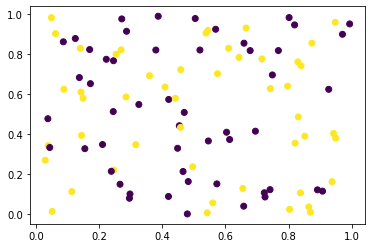

In [12]:
### h distribution
X_h, y_h = gen_data(100)
plt.scatter(X_h[:, 0], X_h[:, 1], marker='o', c=y_h)

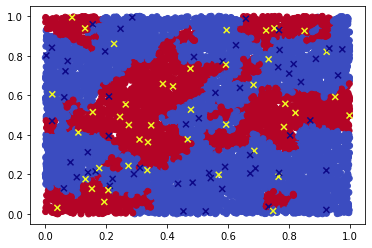

In [ ]:
### visualize h distribution
plot_h(X_h, y_h, 3)

### Excercise 7

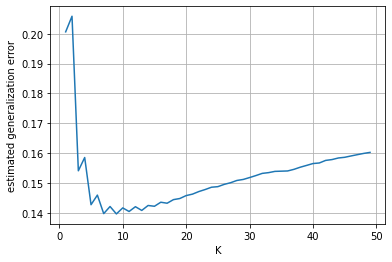

In [4]:
#calculate the averaged generalization error for each k and plot the curve
k_list = [i for i in range(1,50)]
error_list = gen_error_list(X_h, y_h, 4000, k_list)
#plot and save the figure
plt.plot(k_list, error_list)
plt.xlabel("K")
plt.ylabel("estimated generalization error")
plt.grid()
plt.savefig("2-7", dpi=500)
plt.show()

### Excercise 8

In [15]:
#Define specific gen_error_list for Ex8, with an extra output optimal_k
def gen_error_list(X_h, y_h, train_size, k_list):
    '''
    Input: -X_h: array, 100 data points generated uniform randomly.

           -y_h: array, corresponded labels of X_h

           -train_size: array, list containing sizes of training set that we want to test

           -k_list: array, list containing number of k that we want to test

    Output: -error_list: array, list containing generalization error list, 
                         each entry represents the generalization error 
                         averaged on 100 runs using specified k

            -optimal_k: array, list containing optimal k value for each of the training size,
                        averaged on 100 runs.
    '''
    error_list = np.zeros(len(k_list))
    optimal_k = 0
    for epoch in range(100):
        #1. sample h  h = knn(X_h, y_h, x_test, 3) 100, 3
        #2. generate 4000 training data and 1000 testing data
        X_train, y_train = train_test_data(train_size, X_h, y_h, noise=0.2)
        X_test, y_test = train_test_data(1000, X_h, y_h, noise=0.2)
        #3. error evaluation
        label_matrix = label_mat(X_train, y_train, X_test)
        k_error_list = []
        
        for k in k_list:
            k_error = 0
            for i in range(len(y_test)):
                y_pred = np.argmax(np.bincount(label_matrix[i][:k]))
                if y_pred != y_test[i]:
                    k_error += 1
            k_error_list.append(k_error/len(y_test))
        optimal_k += np.argmin(k_error_list)+1
        error_list += np.array(k_error_list)
    optimal_k /= 100
    error_list /= 100
    
    return error_list, optimal_k

In [16]:
#paramter initialization for Ex8
train_size_list = [100]
sub_list = [500*i for i in range(1, 9)]
train_size_list.extend(sub_list)
optimal_list = []
k_list = [i for i in range(1,50)]

In [ ]:
#run process of Ex8
for train_size in train_size_list:
    _, optimal_k = gen_error_list(X_h, y_h, train_size, k_list)
    optimal_list.append(optimal_k)
#plot and save the figure for Ex8
plt.plot(train_size_list, optimal_list)
plt.xlabel("number of training samples m")
plt.ylabel("optimal K")
plt.grid()
plt.savefig("2-8", dpi=500)
plt.show()

In [4]:
import numpy as np
a = np.ones((2, 2))
b = np.ones((10, 2))
res = np.zeros((2, 10))
for i in range(len(a)):
    res[i] = np.dot(b, a[i])

In [5]:
res

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [9]:
a = np.ones((2, 2))
b = np.ones((10, 2))
a[0].shape

(2,)

In [13]:
np.exp(0)

1.0

In [26]:
y = np.array([1, -1, 1])

In [27]:
np.outer(y, y)

array([[ 1, -1,  1],
       [-1,  1, -1],
       [ 1, -1,  1]])

In [29]:
import cvxpy
x = cvxpy.Variable(5)

In [30]:
x.shape

(5,)

In [31]:
x.T

Variable((5,))

In [33]:
np.ones(10) @ np.ones(10)

10.0

In [34]:
np.ones(2) * np.ones(2)

array([1., 1.])

In [36]:
np.ones(2).reshape(-1, 1) * np.ones((2, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [37]:
a = np.array([1,23,4,333,12])
np.argmax(a)

3

In [39]:
from scipy.spatial.distance import cdist

a = np.ones((9000, 10))
b = np.ones((4000, 10))

cdist(a, b).shape

(9000, 4000)

In [42]:
a = np.array([[1,2],[-3, 4]])
np.min(a)

-3

In [45]:
np.argwhere(a == np.min(a))[0][0]

1

In [47]:
np.max(np.array([1,1,1]))

1

array([ 1.        ,  3.33333333,  5.66666667,  8.        , 10.33333333,
       12.66666667, 15.        ])

In [49]:
(2.0**np.linspace(-2,1,7))

array([0.25      , 0.35355339, 0.5       , 0.70710678, 1.        ,
       1.41421356, 2.        ])

In [52]:
np.random.randint(0, 10)

5

In [53]:
a = [[1,2]]
[1,2] in a

True

In [54]:
a = [1]

b = a.pop(0)

In [55]:
b

1

In [56]:
a

[]